In [1]:

import os
import time
import numpy as np
import pandas as pd
import easyaccess as ea
import matplotlib.pyplot as plt
%matplotlib inline

## Query DB for exposures meeting basic criteria

In [15]:
def query_explist(band, n1, n2):
    q1 = "with w as (select expnum, max(lastchanged_time) maxtime from finalcut_eval"
    q1 += "          where analyst!='SNQUALITY' group by expnum"
    q1 += "          )"
    q1 += " select e.expnum, e.nite, e.exptime, e.band, e.object, fcut.t_eff"
    q1 += " from w, exposure e, finalcut_eval fcut"
    q1 += " where nite between {0} and {1}".format(n1, n2)
    q1 += " and exptime between 20 and 100"
    q1 += " and e.object like '%hex%'"
    q1 += " and e.band='{0}'".format(band)
    q1 += " and e.expnum=fcut.expnum"
    q1 += " and fcut.accepted='True'"
    q1 += " and fcut.program='survey'"
    q1 += " and fcut.analyst != 'SNQUALITY'"
    q1 += " and fcut.lastchanged_time=w.maxtime"
    q1 += " order by fcut.t_eff"
    connect = ea.connect('desoper')
    cursor = connect.cursor()
    df = connect.query_to_pandas(q1)
    df_tmp = df.copy(deep=True) 
    # connect.close()
    return df_tmp

In [17]:
t0 = time.time()
que_g = query_explist('g', 20160921, 20161003)
que_r = query_explist('r', 20160921, 20161003)
que_i = query_explist('i', 20160921, 20161003)
que_z = query_explist('z', 20160921, 20161003)
que_Y = query_explist('Y', 20160921, 20161003)
t1 = time.time()
print("{0:.2f} minutes in queries".format((t1 - t0) / 60.))

Connecting to DB ** desoper ** ...
Connecting to DB ** desoper ** ...
Connecting to DB ** desoper ** ...
Connecting to DB ** desoper ** ...
Connecting to DB ** desoper ** ...
4.73 minutes in queries


## Load *explist* files (used for past templates creation)

In [2]:
df_g = pd.read_csv('explist_y4_e1_g.csv', sep=None, engine='python')
df_r = pd.read_csv('explist_y4_e1_r.csv', sep=None, engine='python')
df_i = pd.read_csv('explist_y4_e1_i.csv', sep=None, engine='python')
df_z = pd.read_csv('explist_y4_e1_z.csv', sep=None, engine='python')
df_Y = pd.read_csv('explist_y4_e1_Y.csv', sep=None, engine='python')

## Plotting side by side the previously employed *explists* and the set coming from DB

In [66]:
def quick_plot(df1, df2 , color1, color2, band):
    fig, ax = plt.subplots(1, 2, figsize=(16, 8))
    #
    w = np.ones_like(df1['T_EFF'].values) / float(df1['T_EFF'].values.size)
    h_data = np.histogram(df1['T_EFF'], bins='auto')
    ax[0].hist(df1['T_EFF'], bins=h_data[0].size, histtype='stepfilled', lw=2, color=color1, 
               weights=w, label='only explist CSV')
    ax[0].legend(loc='upper right')
    ax[0].set_xlabel('T_EFF')        
    ax[0].set_ylabel('Normalized frequency')
    #
    w2 = np.ones_like(df2['T_EFF'].values) / float(df2['T_EFF'].values.size)
    h_data_db = np.histogram(df2['T_EFF'], bins='auto')
    ax[1].hist(df1['T_EFF'], bins=h_data[0].size, histtype='stepfilled', lw=2, color=color1, 
               weights=w, label='only explist CSV')
    ax[1].hist(df2['T_EFF'], bins=h_data_db[0].size, histtype='step', lw=2, color=color2, 
               weights=w2, label='DB')
    ax[1].set_xlim([0.2, 2.4])
    ax[1].set_xlabel('T_EFF')
    ax[1].set_ylabel('Normalized frequency')
    ax[1].legend(loc='upper right')
    #
    plt.suptitle('{0}-band'.format(band), fontsize=16)

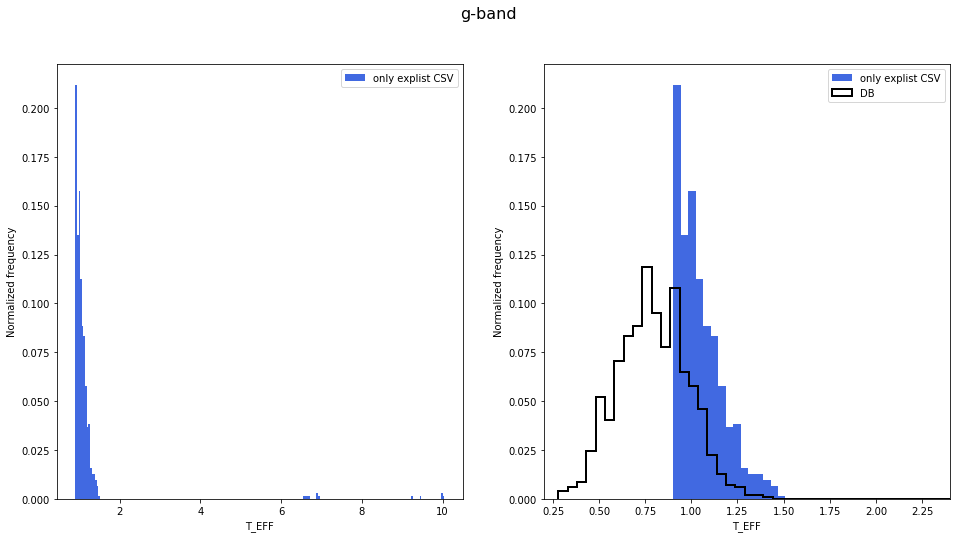

In [67]:
quick_plot(df_g, que_g, 'royalblue', 'black', 'g')

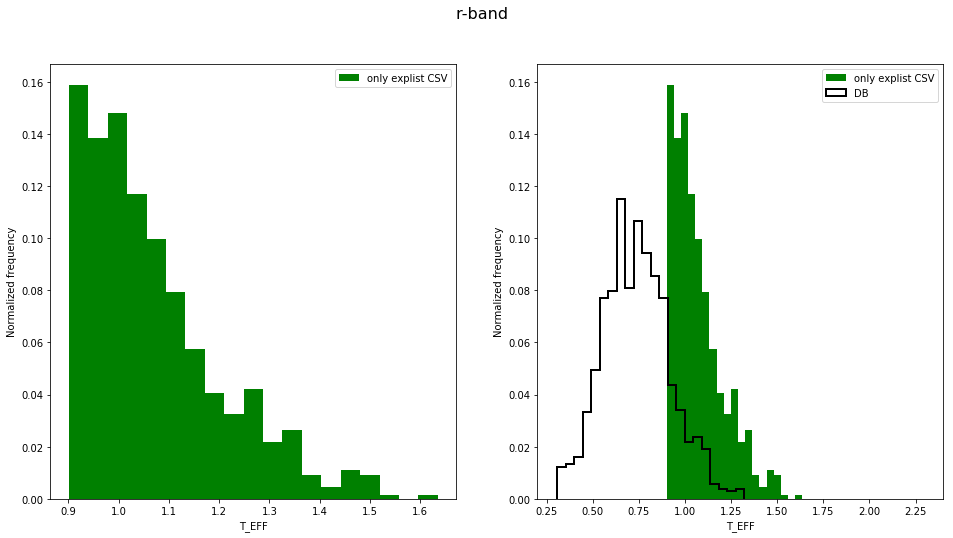

In [68]:
quick_plot(df_r, que_r, 'green', 'black', 'r')

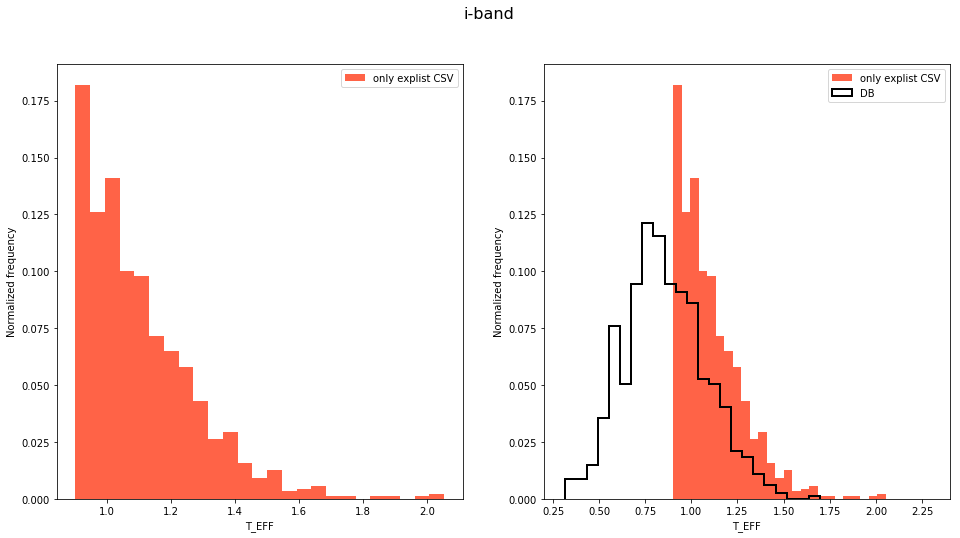

In [69]:
quick_plot(df_i, que_i, 'tomato', 'black', 'i')

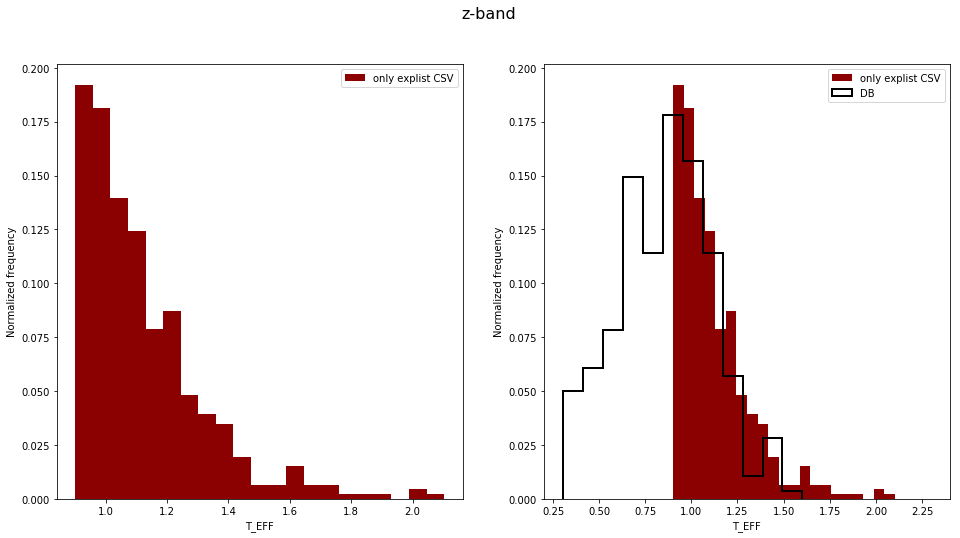

In [70]:
quick_plot(df_z, que_z, 'darkred', 'black', 'z')

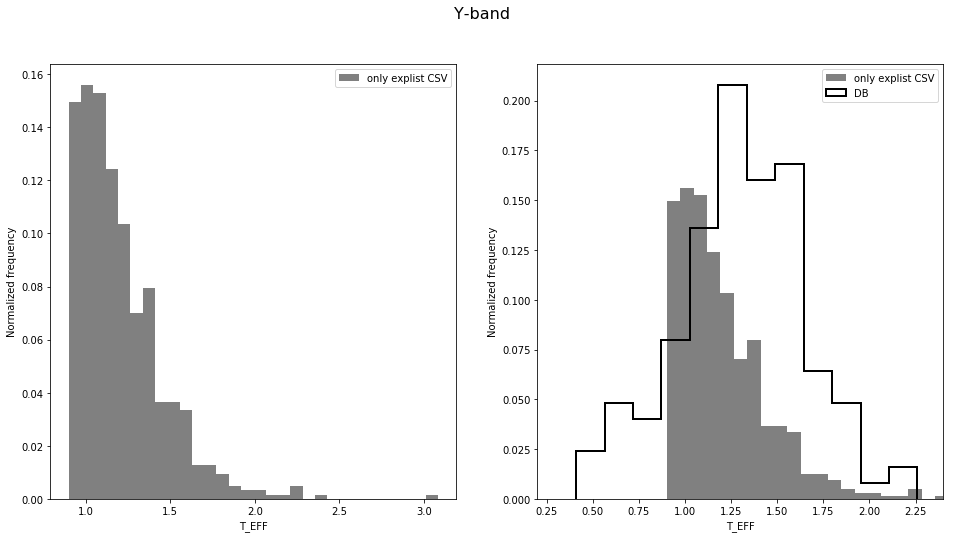

In [71]:
quick_plot(df_Y, que_Y, 'gray', 'black', 'Y')